# Setting
### Finding data

In [243]:
# copied from Julius's notebook
import matplotlib.pyplot as plt
import numpy as np
from dask.diagnostics import ProgressBar

In [244]:
# copied from Julius's notebook
# use intake-esm to load the Pangeo CMIP6 cloud collection
import intake
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [245]:
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,hfls,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,hus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,prw,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
511420,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,sfcWind,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511421,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,uas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511422,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,day,rlut,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511423,ScenarioMIP,AS-RCEC,TaiESM1,ssp585,r1i1p1f1,day,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/s...,NaN,20210721


In [246]:
np.sort(col.df['source_id'].unique())

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'AWI-ESM-1-1-LR',
       'BCC-CSM2-HR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0',
       'CAS-ESM2-0', 'CESM1-1-CAM5-CMIP5', 'CESM1-WACCM-SC', 'CESM2',
       'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM',
       'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CMCC-CM2-VHR4', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5',
       'CanESM5-CanOE', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-LR',
       'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'EC-Earth3P', 'EC-Earth3P-HR',
       'EC-Earth3P-VHR', 'ECMWF-IFS-HR', 'ECMWF-IFS-LR', 'FGOALS-f3-H',
       'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-AM4', 'GFDL-CM4',
       'GFDL-CM4C192', 'GFDL-ESM2M', 'GFDL-ESM4', 'GFDL-OM4p5B',
       'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'GISS-E2-2-G',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-LM',
       'HadGEM3-GC31-MM', 'IITM-ESM', 'I

### Choosing datasets

In [310]:
# choose datasets by experiment_id & variable_id
# e.g. when you want the datasets with experiment_id == 'ssp585' & 'historical' and variable_id == 'no3os' & 'tos'

# all source_id with experiment_id == 'ssp585' or 'historical'
elist1 = col.df[col.df.experiment_id == 'ssp585'].source_id.unique()
elist2 = col.df[col.df.experiment_id == 'historical'].source_id.unique()

elist = set(elist1).intersection(elist2)

# all source_id with variable_id == 'no3os' or 'tos'
vlist1 = col.df[col.df.variable_id == 'no3os'].source_id.unique()
vlist2 = col.df[col.df.variable_id == 'tos'].source_id.unique()

vlist = set(vlist1).intersection(vlist2)

model_list = set(elist).intersection(vlist)
model_list

{'ACCESS-ESM1-5',
 'CESM2',
 'CESM2-WACCM',
 'CNRM-ESM2-1',
 'CanESM5',
 'CanESM5-CanOE',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'IPSL-CM6A-LR',
 'MIROC-ES2L',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'NorESM2-LM',
 'NorESM2-MM',
 'UKESM1-0-LL'}

### Creating a subcollection


As an example, choose some models

In [280]:
# adapted from from Julius's notebook
# create a subcollection with certain search criteria

models = ['CanESM5','GISS-E2-1-G','GFDL-ESM4'] # modified from ['CanESM5-CanOE', 'IPSL-CM6A-LR']
cat = col.search(
    variable_id=['tos', 'no3os'], # SST & surface dissolved nitrate concentration
    source_id=models,
    grid_label='gn',
    table_id='Omon',
    experiment_id=['historical', 'ssp585'],
    member_id = ['r2i1p1f1', 'r3i1p1f1', 'r2i1p2f1', 'r3i1p2f1'] # load only two members for demo purposes
)

# load all datasets into a python dictionary
ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'use_cftime':True}, # recommended for faster reading and better time handling
    storage_options={'token': 'anon'}, # needed to access the public CMIP6 data on google
    aggregate=False,
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [281]:
# to figure out the xarray dataset (this code will give a long list in ddict)
# ddict

Looing into the subselected dataset

In [282]:
# first dataset on ddict list
ds_a = ddict['ScenarioMIP.CCCma.CanESM5.ssp585.r3i1p2f1.Omon.tos.gn.gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r3i1p2f1/Omon/tos/gn/v20190429/.nan.20190429']
ds_a

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1032, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(428, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/58)
    CCCma_model_hash:            Unknown
    CCCma_parent_runid:          p2-his03
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 p2-s8503
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    ...                          ...
    variant_label:               r3i1p2f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/37da9c69-0a49-4ced-9a57-5b79b21...
    version_id:                  v20190429
    intake_esm_varname:          None
    intake_esm_dataset_key:      ScenarioMIP.CCCma.CanESM5.ssp585.r3i1p2f1.Om...

In [283]:
# second dataset on ddict list
ds_b = ddict['CMIP.NASA-GISS.GISS-E2-1-G.historical.r2i1p1f1.Omon.tos.gn.gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r2i1p1f1/Omon/tos/gn/v20180827/.nan.20180827']
ds_b

<xarray.Dataset>
Dimensions:    (lat: 90, bnds: 2, lon: 144, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tos        (time, lat, lon) float32 dask.array<chunksize=(963, 90, 144), meta=np.ndarray>
Attributes: (12/53)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   7300.0
    cmor_version:            3.3.2
    ...                      ...
    variant_label:           r2i1p1f1
    status:                  2019-11-10;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/39049e87-e285-4fc3-9e31-a28dc6c46cc...
    version_id:              v20180827
    intake_esm_varname:      None
    intake_esm_dataset_key:  CMIP.NASA-GISS.GISS-E2-1-G.historical.r2i1p1f1.O...

Checking the dimensions

In [284]:
print(ds_a.dims)
print(ds_b.dims)

Frozen({'i': 360, 'j': 291, 'time': 1032, 'bnds': 2, 'vertices': 4})
Frozen({'lat': 90, 'bnds': 2, 'lon': 144, 'time': 1980})


In [285]:
# copied from Julius's notebook
from cmip6_preprocessing.preprocessing import combined_preprocessing
print(combined_preprocessing(ds_a).dims)
print(combined_preprocessing(ds_b).dims)

Frozen({'time': 1032, 'y': 291, 'x': 360, 'bnds': 2, 'vertex': 4})
Frozen({'time': 1980, 'y': 90, 'x': 144, 'bnds': 2, 'vertex': 4})


In [286]:
# copied from Julius's notebook
# load all datasets into a python dictionary
ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'use_cftime':True}, # recommended for faster reading and better time handling
    storage_options={'token': 'anon'}, # needed to access the public CMIP6 data on google
    aggregate=False,
    preprocess=combined_preprocessing, # this applies the preprocessing to all datasets
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


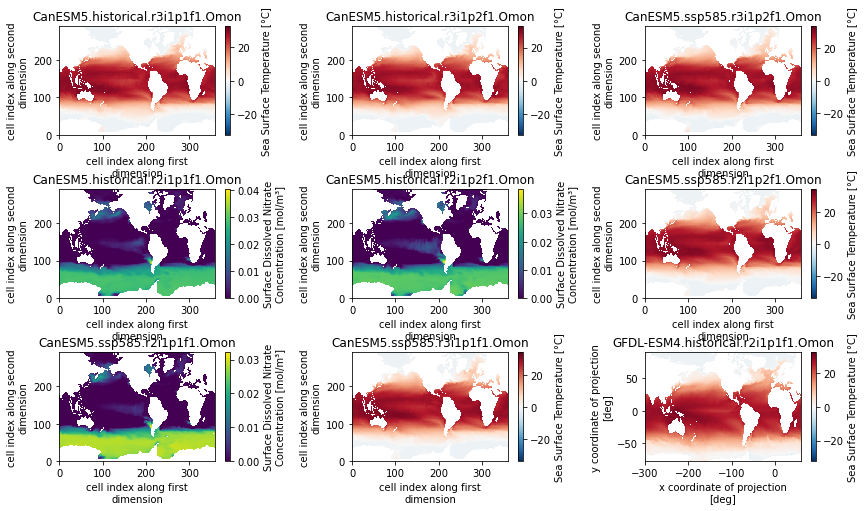

In [287]:
# copied from Julius's notebook
# quick example of how to loop over several models
from cmip6_preprocessing.utils import cmip6_dataset_id
fig, axarr = plt.subplots(ncols=3, nrows=3, figsize=[14,8])
for ax, (name, ds) in zip(axarr.flat, ddict.items()):
    # select the first time step
    ds = ds.isel(time=0)
    # select the datavariable
    da = ds[ds.variable_id]
    # plot
    
    da.plot(ax=ax)
    ax.set_title('.'.join(cmip6_dataset_id(ds).split('.')[2:6]))
    
fig.subplots_adjust(hspace=0.5, wspace=0.5)

### Grouping the dataset (by source_id??)

In [288]:
from cmip6_preprocessing.postprocessing import merge_variables, concat_members, concat_experiments

ddict_combined_a = merge_variables(ddict)

# modified from the original ohw_21_cmip6_pp_tutorial notebook due to experiment_id & variable_id causing errors
def maybe_remove_attrs(ds, attr):
    if attr in ds.attrs.keys():
        del ds.attrs[attr]
    return ds
# remove the `variable_id` attr manually
ddict_combined_aa = {k:maybe_remove_attrs(ds, 'variable_id') for k,ds in ddict_combined_a.items()}
ddict_combined_b = concat_experiments(ddict_combined_aa)
# same thing for experiment_id
ddict_combined_bb = {k:maybe_remove_attrs(ds, 'experiment_id') for k,ds in ddict_combined_b.items()}
ddict_combined = concat_members(ddict_combined_bb)

/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/postprocessing.py:113: UserWarning: Match attributes ['variable_id'] not found in any of the datasets.         This can happen when several combination functions are used.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/postprocessing.py:113: UserWarning: Match attributes ['experiment_id', 'variable_id'] not found in any of the datasets.         This can happen when several combination functions are used.
  warnings.warn(


Dictionary keys

In [289]:
ddict_combined.keys()

dict_keys(['CanESM5.gn.Omon', 'GFDL-ESM4.gn.Omon', 'GISS-E2-1-G.gn.Omon'])

In [290]:
ddict_combined['GFDL-ESM4.gn.Omon']

,Array,Chunk
Bytes,6.12 GiB,101.25 MiB
Shape,"(2, 1980, 576, 720)","(1, 64, 576, 720)"
Count,188 Tasks,62 Chunks
Type,float32,numpy.ndarray


# Masking the Arabian Sea

In [291]:
import regionmask
from cmip6_preprocessing.regionmask import merged_mask
# load ocean basin data
basins = regionmask.defined_regions.natural_earth.ocean_basins_50

/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


AttributeError: 'Dataset' object has no attribute 'no3os'

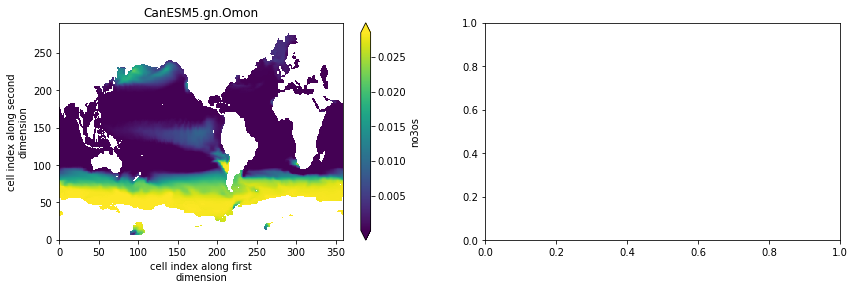

In [292]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[14,4])
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    # show just the first time step
    ds = ds.isel(time=0)
    
    # mask out the surface nitrate where the SST is above 25 deg
    da = ds.no3os.where(ds.tos>=0)
    
    # average all members
    if 'member_id' in da.dims:
        da = da.mean('member_id')
    da.plot(ax=ax, robust=True)
    ax.set_title(name)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


AttributeError: 'Dataset' object has no attribute 'no3os'

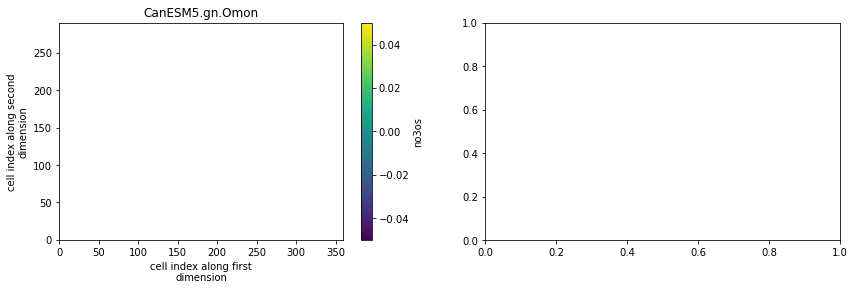

In [299]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[14,4])
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    # show just the first time step
    ds = ds.isel(time=0)

    
    # mask out the SSH where the SST is above 20 deg
    da = ds.no3os.where(ds.tos>=0)
    
    # average all members
    if 'member_id' in da.dims:
        da = da.mean('member_id')
        
    # mask out the indian ocean
    mask = merged_mask(basins, da)
    
    da_masked = da.where(mask == 53) # Arabain Sea 
    
    da_masked.plot(ax=ax, robust=True)
    ax.set_title(name)
fig.subplots_adjust(hspace=0.5, wspace=0.5)